In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load from CellRanger

In [10]:
cellranger_dir = "/oasis/tscc/scratch/cshl_2018/cellranger_results_haber/Atlas1_batch1/outs/analysis/"
cr_tsne = pd.read_csv(cellranger_dir+"tsne/2_components/projection.csv")
print(cr_tsne.shape)
cr_tsne.head()

(1595, 3)


,Barcode,TSNE-1,TSNE-2
0,AAACATTGTTTGGG-1,16.599280,-19.430584
1,AAACCGTGCCAAGT-1,-12.238390,11.951801
2,AAACGCACAGCCTA-1,-23.347530,23.329893
3,AAACGCACCAGATC-1,-32.174463,-2.316999
4,AAACGCACCGCCTT-1,-11.463987,-4.225748


In [15]:
cr_tsne['batch'] = cr_tsne['Barcode'].apply(lambda x :x.split('-')[1])
cr_tsne.set_index('Barcode', inplace=True, drop=True)
print(cr_tsne.shape)
cr_tsne.head()

(1595, 3)


,TSNE-1,TSNE-2,batch
Barcode,,,
AAACATTGTTTGGG-1,16.599280,-19.430584,1
AAACCGTGCCAAGT-1,-12.238390,11.951801,1
AAACGCACAGCCTA-1,-23.347530,23.329893,1
AAACGCACCAGATC-1,-32.174463,-2.316999,1
AAACGCACCGCCTT-1,-11.463987,-4.225748,1


In [16]:
clusters = pd.read_csv(cellranger_dir+"clustering/graphclust/clusters.csv", index_col=0)
clusters.head()

,Cluster
Barcode,
AAACATTGTTTGGG-1,3
AAACCGTGCCAAGT-1,2
AAACGCACAGCCTA-1,5
AAACGCACCAGATC-1,3
AAACGCACCGCCTT-1,2


In [17]:
cr_tsne = cr_tsne.join(clusters)
print(cr_tsne.shape)
cr_tsne.head()

(1595, 4)


,TSNE-1,TSNE-2,batch,Cluster
Barcode,,,,
AAACATTGTTTGGG-1,16.599280,-19.430584,1,3
AAACCGTGCCAAGT-1,-12.238390,11.951801,1,2
AAACGCACAGCCTA-1,-23.347530,23.329893,1,5
AAACGCACCAGATC-1,-32.174463,-2.316999,1,3
AAACGCACCGCCTT-1,-11.463987,-4.225748,1,2


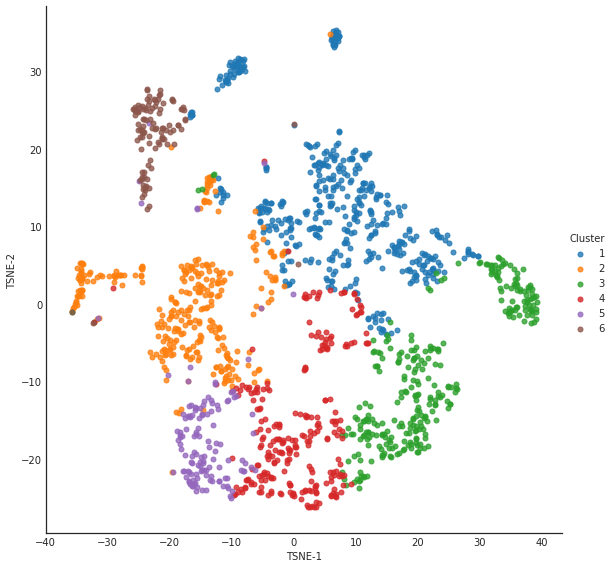

In [18]:
sns.set_style('white')

g = sns.lmplot('TSNE-1', 'TSNE-2', cr_tsne, hue='Cluster', fit_reg=False, 
              scatter_kws={"s":25}, size=8)